## Final Project

In [87]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [89]:
#import the library and tools
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2020,1,31)
end_date = datetime(2024,8,31)

In [90]:
#download the datasets
stock = yf.download('TSLA',start= start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


## Stock Analysis and Competitor Summary

In [91]:
#Stock Analysis and Competitor Summary(Assignment1)
stock.info()
print(stock.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1154 entries, 2020-01-31 to 2024-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1154 non-null   float64
 1   High       1154 non-null   float64
 2   Low        1154 non-null   float64
 3   Close      1154 non-null   float64
 4   Adj Close  1154 non-null   float64
 5   Volume     1154 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.1 KB
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-31  42.666668  43.533333  42.167999  43.371334  43.371334  235789500
2020-02-03  44.912666  52.409332  44.901333  52.000000  52.000000  705975000
2020-02-04  58.863998  64.599335  55.591999  59.137333  59.137333  914082000
2020-02-05  54.883999  56.398666  46.940666  48.980000  48.980000  726357000
2020-02-06  46.661331  53.055332  45.799999

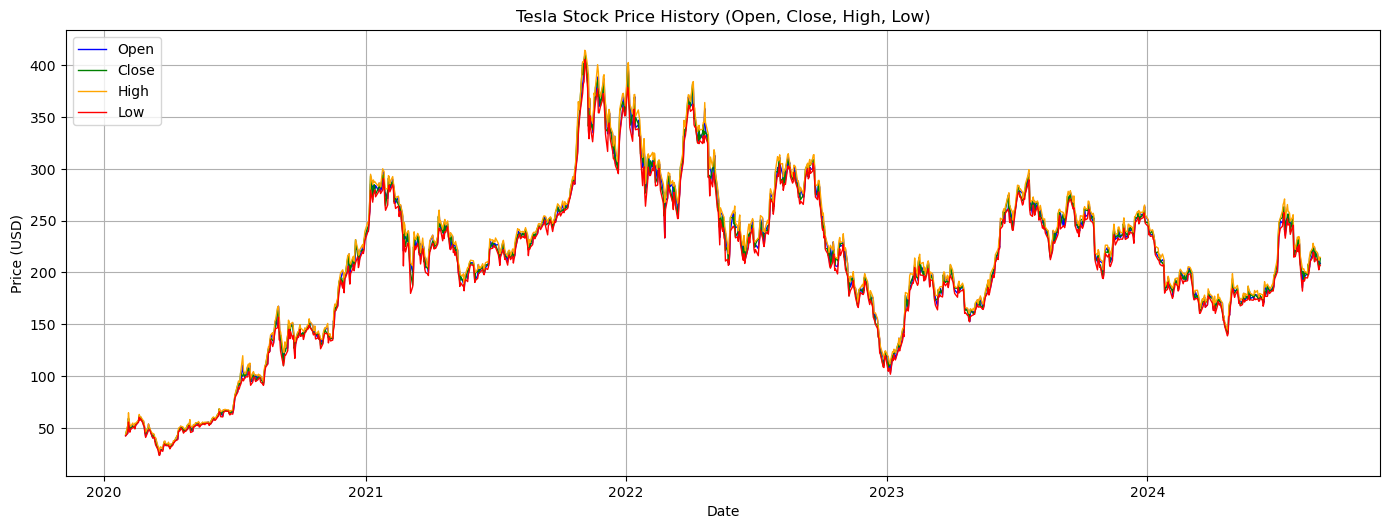

In [92]:
#Plot the stock price history(Open, Close, High, Low)
# Ensure index is datetime for Matplotlib compatibility
stock.index = pd.to_datetime(stock.index)

plt.figure(figsize=(14, 10))

# Plot Open, Close, High, Low
plt.subplot(2, 1, 1)
plt.plot(stock.index, stock['Open'], label='Open', color='blue', linewidth=1)
plt.plot(stock.index, stock['Close'], label='Close', color='green', linewidth=1)
plt.plot(stock.index, stock['High'], label='High', color='orange', linewidth=1)
plt.plot(stock.index, stock['Low'], label='Low', color='red', linewidth=1)
plt.title('Tesla Stock Price History (Open, Close, High, Low)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Find 3 competitors and visualize their stock price history in the same time period - BMW, NIO, and BYD

[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                       Close             \
Ticker                        BMW.DE        BYD   NIO     BMW.DE        BYD   
Date                                                                          
2020-01-31 00:00:00+00:00  46.924061  28.973953  3.78  64.339996  29.850000   
2020-02-03 00:00:00+00:00  46.953236  29.527222  4.06  64.379997  30.420000   
2020-02-04 00:00:00+00:00  47.368942  30.391104  4.51  64.949997  31.309999   
2020-02-05 00:00:00+00:00  48.295177  31.119093  4.39  66.220001  32.060001   
2020-02-06 00:00:00+00:00  48.375401  31.827662  4.08  66.330002  32.790001   

Price                                 High                         Low  \
Ticker                      NIO     BMW.DE        BYD   NIO     BMW.DE   
Date                                                                     
2020-01-31 00:00:00+00:00  3.78  65.680000  31.129999  4.04  64.209999   
2020-02-03 00:00:00+00:00  4.06  64.750000  30.670000  4.11  63.900002 

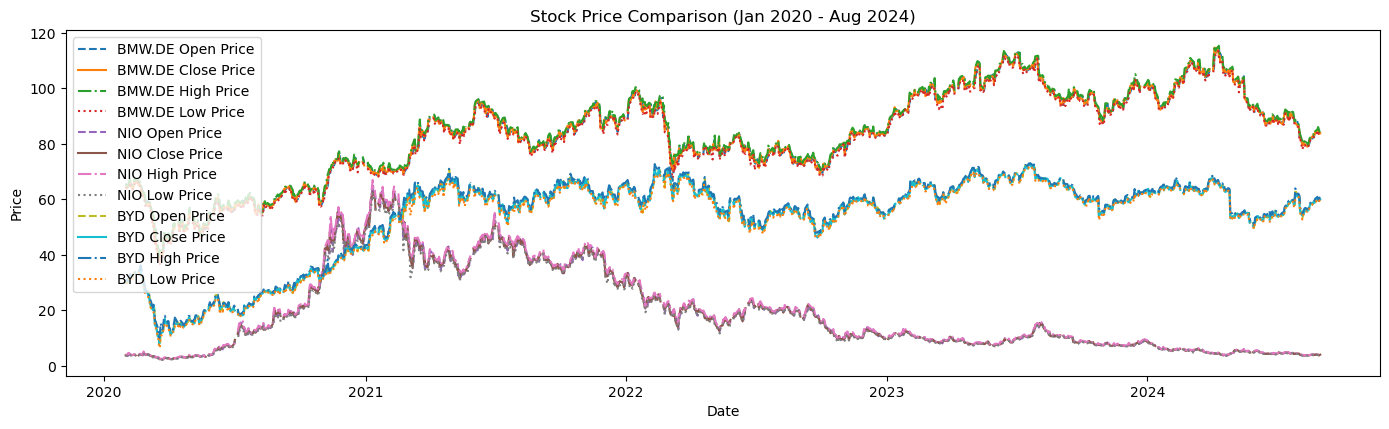

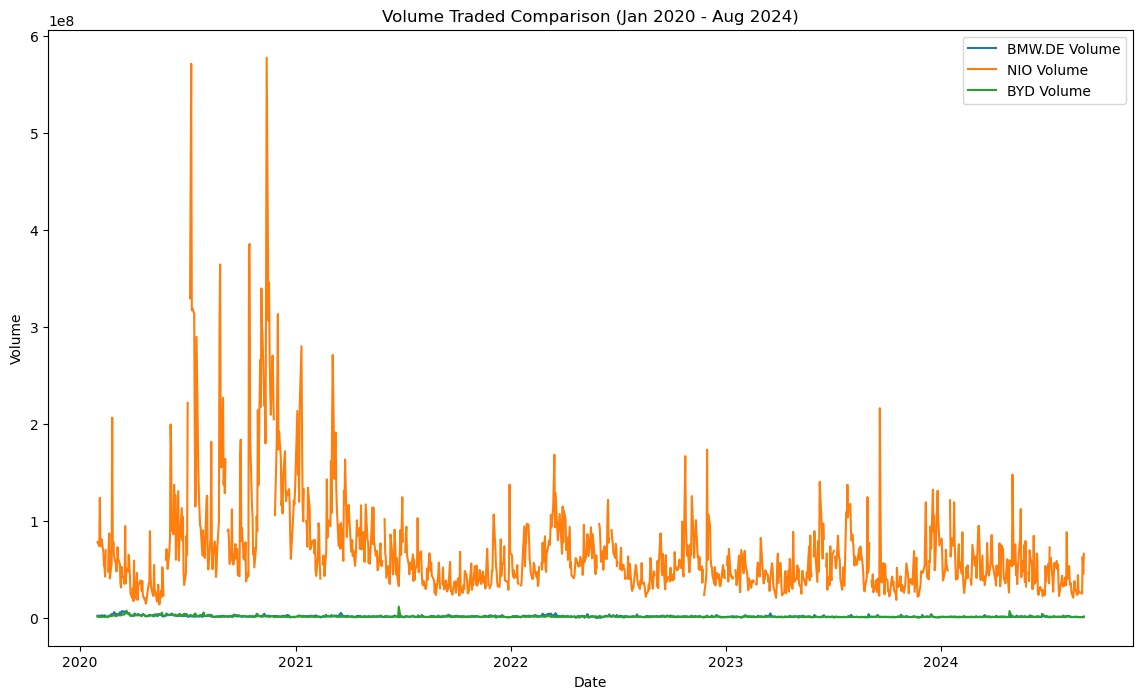

In [93]:
tickers = ['BMW.DE', 'NIO', 'BYD', ]

#download the stock data from yfinance:
data = yf.download(tickers, start = start_date, end = end_date )
print(data.head())

# Visualize Open, Close, High, Low prices for all tickers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)# Loop through each ticker and plot Open, Close, High, and Low prices
for ticker in tickers:
    plt.plot(data['Open'][ticker], label=f'{ticker} Open Price', linestyle='--') 
    plt.plot(data['Close'][ticker], label=f'{ticker} Close Price')  
    plt.plot(data['High'][ticker], label=f'{ticker} High Price', linestyle='-.')  
    plt.plot(data['Low'][ticker], label=f'{ticker} Low Price', linestyle=':')  
    
plt.title('Stock Price Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.tight_layout()
plt.show()


# Visualize Volume traded for all tickers
plt.figure(figsize=(14, 8))


# Loop through each ticker and plot trading volume
for ticker in tickers:
    plt.plot(data['Volume'][ticker], label=f'{ticker} Volume')

# Set the title and axis labels for the volume plot
plt.title('Volume Traded Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend() 
plt.show()

## Extracting the adjusted close of Tesla, calculating mean, variance, skewness and kurtosis, and kernel density estimation¶

mean: 210.14264989684318
variance: 6012.5161981367355
Skewness: -0.32115954806352676
Kurtosis: 0.0443775961996411


Text(0.5, 0, 'Adjusted Close Price (USD)')

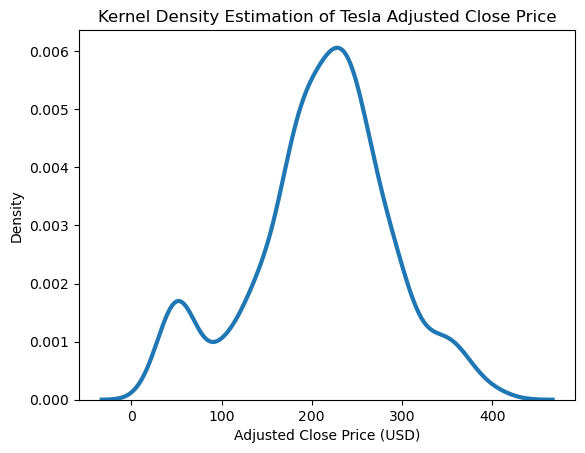

In [94]:
# extract the adjusted close column from the datasets
adjusted_close = stock['Adj Close'].dropna()

# calculate the mean, variance, skewness, and kurtosis of the adjusted close column
mean_adj_close = np.mean(adjusted_close)
variance_adj_close = np.var(adjusted_close)
skewness_adj_close = ss.skew(adjusted_close)
kurtosis_adj_close = ss.kurtosis(adjusted_close)

#Display the values:
print("mean:", mean_adj_close)
print("variance:",variance_adj_close)
print("Skewness:", skewness_adj_close)
print("Kurtosis:", kurtosis_adj_close)
sns.kdeplot(data=adjusted_close,linewidth=3)
plt.title('Kernel Density Estimation of Tesla Adjusted Close Price')
plt.xlabel('Adjusted Close Price (USD)')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Statistics for BMW.DE:
Mean: 67.80077816013258
Variance: 299.2449194121314
Skewness: 0.1037293701200865
Kurtosis: -0.57692825398918

Statistics for NIO:
Mean: 21.404304163356425
Variance: 234.43455561249667
Skewness: 0.7609200766213937
Kurtosis: -0.5848949673675947

Statistics for BYD:
Mean: 50.81845785277501
Variance: 251.83512668194336
Skewness: -1.0505994327950332
Kurtosis: -0.21022306161912274


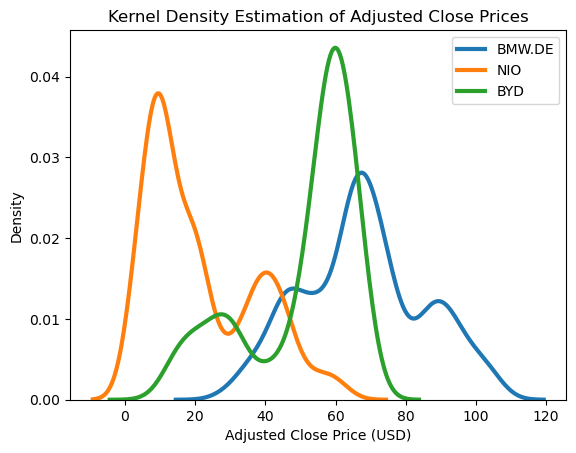

In [95]:
# tickers = ['BYDDF', 'BMWYY', 'NIO']
import scipy.stats as ss
import seaborn as sns

tickers = ['BMW.DE', 'NIO', 'BYD']
data = {ticker: yf.download(ticker, start='2020-01-01', end='2024-01-01')['Adj Close'].dropna() for ticker in tickers}

# Calculate statistics and visualize KDE for each ticker
for ticker, adjusted_close in data.items():
    # Calculate mean, variance, skewness, and kurtosis
    mean_adj_close = np.mean(adjusted_close)
    variance_adj_close = np.var(adjusted_close)
    skewness_adj_close = ss.skew(adjusted_close)
    kurtosis_adj_close = ss.kurtosis(adjusted_close)
    
    # Print the statistics
    print(f"\nStatistics for {ticker}:")
    print("Mean:", mean_adj_close)
    print("Variance:", variance_adj_close)
    print("Skewness:", skewness_adj_close)
    print("Kurtosis:", kurtosis_adj_close)
    
    # Plot Kernel Density Estimation
    sns.kdeplot(data=adjusted_close, linewidth=3, label=ticker)

plt.title('Kernel Density Estimation of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()

## Feature Database Creation

#### 3. Feature Selection from FRED

In [96]:

# fred = Fred(api_key='add your api key and dont forget to remove it before commit')
varList = [
    'T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # Term premium, 30-year jumbo mortgage
    'DEXUSEU', 'DEXJPUS', 'DEXUSUK',       # Spot exchange rates
    'CBBTCUSD', 'CBETHUSD',                # Cryptocurrencies
    'T10YIE', 'DCOILBRENTEU',              # Breakeven inflation, Brent oil price
    'VIXCLS', 'CBSICO',                    # Implied volatilities, consumer sentiment
    'DAAA', 'DBAA',                        # Corporate bond yields
    'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2', 'BAMLH0A0HYM2EY', 
    'DGS1', 'DCOILWTICO', 'DHHNGSP',        # Additional economic indicators
    'ALTSALES',                             # Light Weight Vehicle Sales: Autos and Light Trucks
    
]

# also look at https://tradingeconomics.com/commodity/

# SP500 = fred.get_series('SP500')
# SP500.name = 'SP500'
# df_fred = SP500

# # merge data series
# for i in range(0, len(varList)):
#     series_info = fred.get_series_info(varList[i])

#     # Extract the title
#     title = series_info['title']
#     print(varList[i],'-', title)
    
#     data = fred.get_series(varList[i])
#     data.name = varList[i]
#     df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

####  Please use the features/factors you take and discovered (e.g. FRED, Fama-French website, ADS, momentum factors, technical indicators, volume, price/return lags, etc.) to construct a feature database

In [97]:

import pandas as pd
import numpy as np
from fredapi import Fred
import yfinance as yf

# 1. FAMA-FRENCH 5 FACTORS
# Get the Fama French 5 factor model (monthly data)
data_ff5 = pd.read_csv('FF_Research_Data_5_Factors_daily.csv')
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]
                    
data_ff5['date'] = pd.to_datetime(data_ff5['date'])
# data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')

# 2. ADS INDEX
data_ads = pd.read_excel('ADS_Index_Most_Current_Vintage.xlsx')
data_ads['date'] = pd.to_datetime(data_ads['date'])
df_ads = data_ads.set_index('date')


# 3. FRED DATA
fred = Fred(api_key='e2b9d6351c036c7e0a59b80b5713645a')
varList = ['T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP 
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price 
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
              'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY', 'DGS1', 'DCOILWTICO', 
                              'DHHNGSP'] 
SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500
# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

# Resample Fama-French, ADS, and FRED data to daily frequency
df_ffs_daily = df_ffs.resample('D').interpolate(method='linear')
df_ads_daily = df_ads.resample('D').interpolate(method='linear')
df_fred_daily = df_fred.resample('D').interpolate(method='linear')

# 4. STOCK DATA (TESLA)
stock_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2024-08-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Add technical indicators

# Calculate Simple Moving Averages (SMA)
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Averages (EMA)
stock_data['EMA_20'] = stock_data['Close'].ewm(span=20, adjust=False).mean()
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

def compute_RSI(data, window=14):
    diff = data.diff(1)
    gain = diff.where(diff > 0, 0).rolling(window=window).mean()
    loss = -diff.where(diff < 0, 0).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))
# Calculate RSI
stock_data['RSI'] = compute_RSI(stock_data['Close'], window=14)

# Calculate Momentum for multiple periods for Tesla stock
momentum_periods = [10, 20, 50]
for period in momentum_periods:
    stock_data[f'Momentum_{period}'] = stock_data['Close'] - stock_data['Close'].shift(period)

def compute_MACD(data, span_long=26, span_short=12, span_signal=9):
    EMA_short = data.ewm(span=span_short, adjust=False).mean()
    EMA_long = data.ewm(span=span_long, adjust=False).mean()
    MACD_line = EMA_short - EMA_long
    signal_line = MACD_line.ewm(span=span_signal, adjust=False).mean()
    return MACD_line, signal_line

stock_data['MACD'], stock_data['Signal_Line'] = compute_MACD(stock_data['Close'])

print(stock_data[['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'Signal_Line']].tail())

# Moving average of volume
stock_data['Volume_MA10'] = stock_data['Volume'].rolling(window=10).mean()

# Add lag features
# Price lags
stock_data['Lag_1'] = stock_data['Close'].shift(1)
stock_data['Lag_5'] = stock_data['Close'].shift(5)

# Return lags (daily returns)
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Return_Lag1'] = stock_data['Return'].shift(1)
stock_data['Return_Lag5'] = stock_data['Return'].shift(5)

# Add Bollinger Bands
def bollinger_bands(data, window=20, num_of_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return upper_band, lower_band

stock_data['Upper_Band'], stock_data['Lower_Band'] = bollinger_bands(stock_data)

# Add ATR
def atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    return true_range.rolling(window=window).mean()

stock_data['ATR'] = atr(stock_data)

# Add macroeconomic indicators to stock_data
gdp_growth = fred.get_series('GDP', observation_start='2020-01-31')
unemployment = fred.get_series('UNRATE', observation_start='2020-01-31')
stock_data['GDP_Growth'] = gdp_growth.reindex(stock_data.index, method='ffill')
stock_data['Unemployment_Rate'] = unemployment.reindex(stock_data.index, method='ffill')

# Combine all data into a single DataFrame
DATA = pd.concat([stock_data, df_ffs_daily, df_ads_daily, df_fred_daily], axis=1)
print(DATA.columns)
DATA['Target'] = DATA['Close'].shift(-1)
DATA = DATA.dropna()

# Read lithium index
lithium_index_data = pd.read_csv('lithium_index_data.csv')

# Convert 'Date' to datetime if not already in that format
lithium_index_data['Date'] = pd.to_datetime(lithium_index_data['Date'])

# Set the 'Date' as the index
lithium_index_data.set_index('Date', inplace=True)

# Align 'Adj Close' to match the stock_data index and add it as a new column
DATA['Lithium_Adj_Close'] = lithium_index_data['Adj Close'].reindex(DATA.index, method='ffill')


# Add Elon Musk's sentiment analysis score for fun haha
sentiment_analysis_df = pd.read_csv('sentiment_scores.csv')

# Convert 'Date' to datetime if not already in that format
sentiment_analysis_df['Date'] = pd.to_datetime(sentiment_analysis_df['Date'])

# Set the 'Date' as the index
sentiment_analysis_df.set_index('Date', inplace=True)

# Add the compound score to DATA as column
DATA['Elon_Tweet_Sentiment'] = sentiment_analysis_df['compound'].reindex(DATA.index, fill_value=0)

# Save to a single CSV file
DATA.to_csv('Final_Feature_Database.csv', index=True)

[*********************100%***********************]  1 of 1 completed


                SMA_20      SMA_50      EMA_20      EMA_50        RSI  \
Date                                                                    
2024-08-26  210.879002  218.661001  215.144090  212.448426  56.911915   
2024-08-27  210.208502  219.285001  214.578939  212.321429  60.139462   
2024-08-28  208.892502  219.651201  213.738088  212.063726  54.191438   
2024-08-29  208.363502  220.079601  213.027794  211.836913  53.838631   
2024-08-30  208.685502  220.730401  213.130861  211.926054  59.538565   

                MACD  Signal_Line  
Date                               
2024-08-26 -0.720729    -1.900949  
2024-08-27 -1.104210    -1.741601  
2024-08-28 -1.668085    -1.726898  
2024-08-29 -2.048580    -1.791234  
2024-08-30 -1.698727    -1.772733  
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_20',
       'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'Momentum_10', 'Momentum_20',
       'Momentum_50', 'MACD', 'Signal_Line', 'Volume_MA10', 'Lag_1', 'Lag_5',
       'Retu

### Demonstrate the feature selection process if you use regression-based approach (Ridge regression, LASSO, Elastic Net or LARS) . Virtualize the feature importance if you use decision-tree-based approach (random forest, XGBoost). 

/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.70244e-19): result may not be accurate.

/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+04, tolerance: 3.710e+02

/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.936e+04, tolerance: 3.710e+02



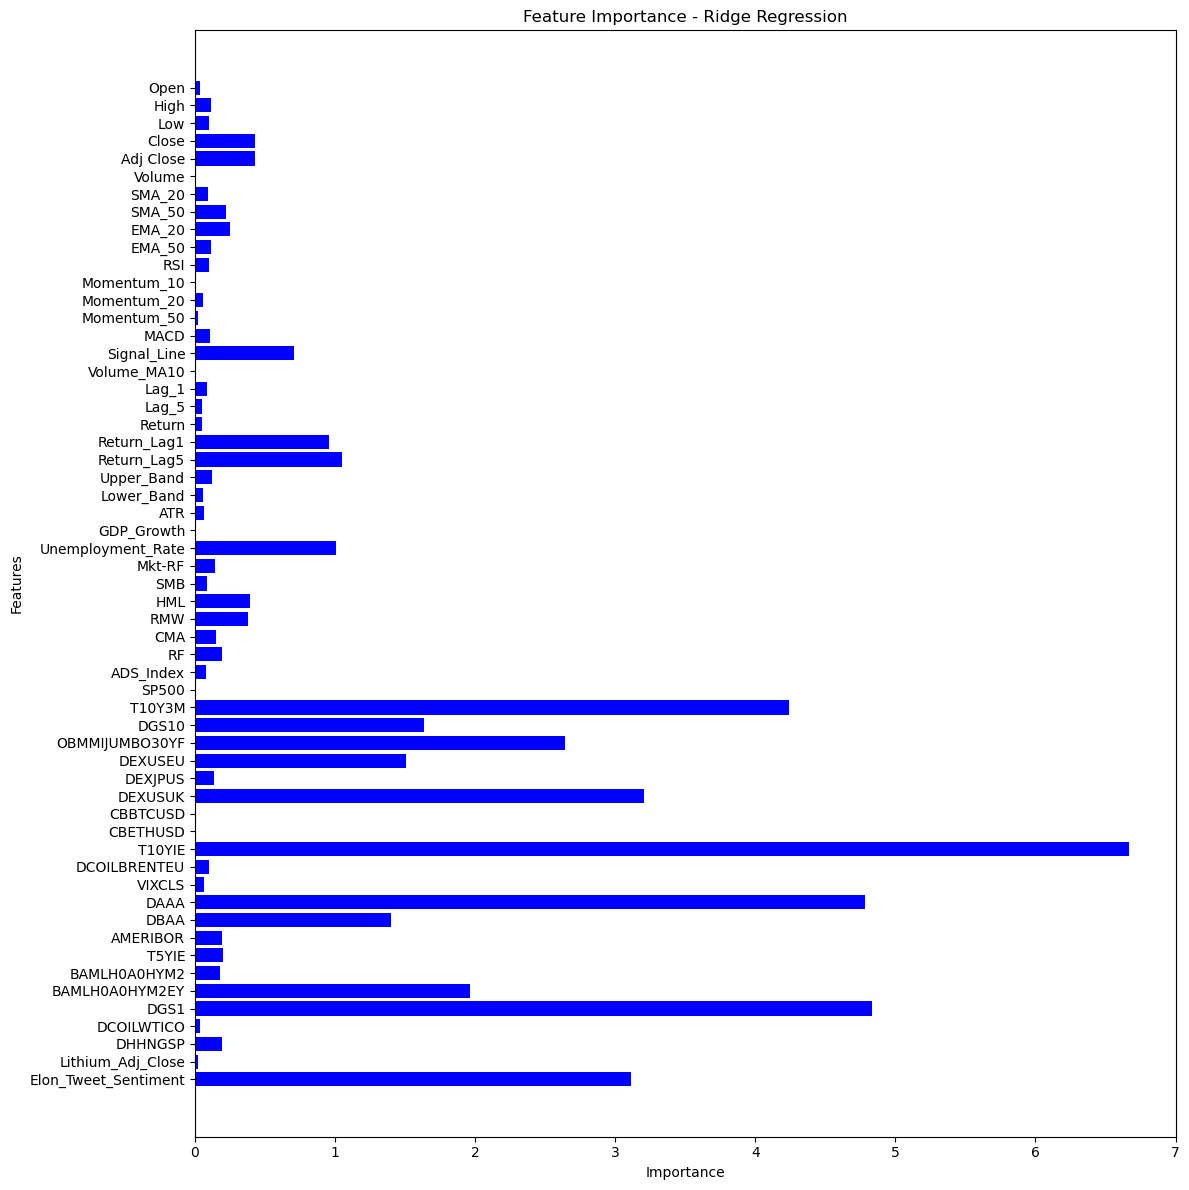

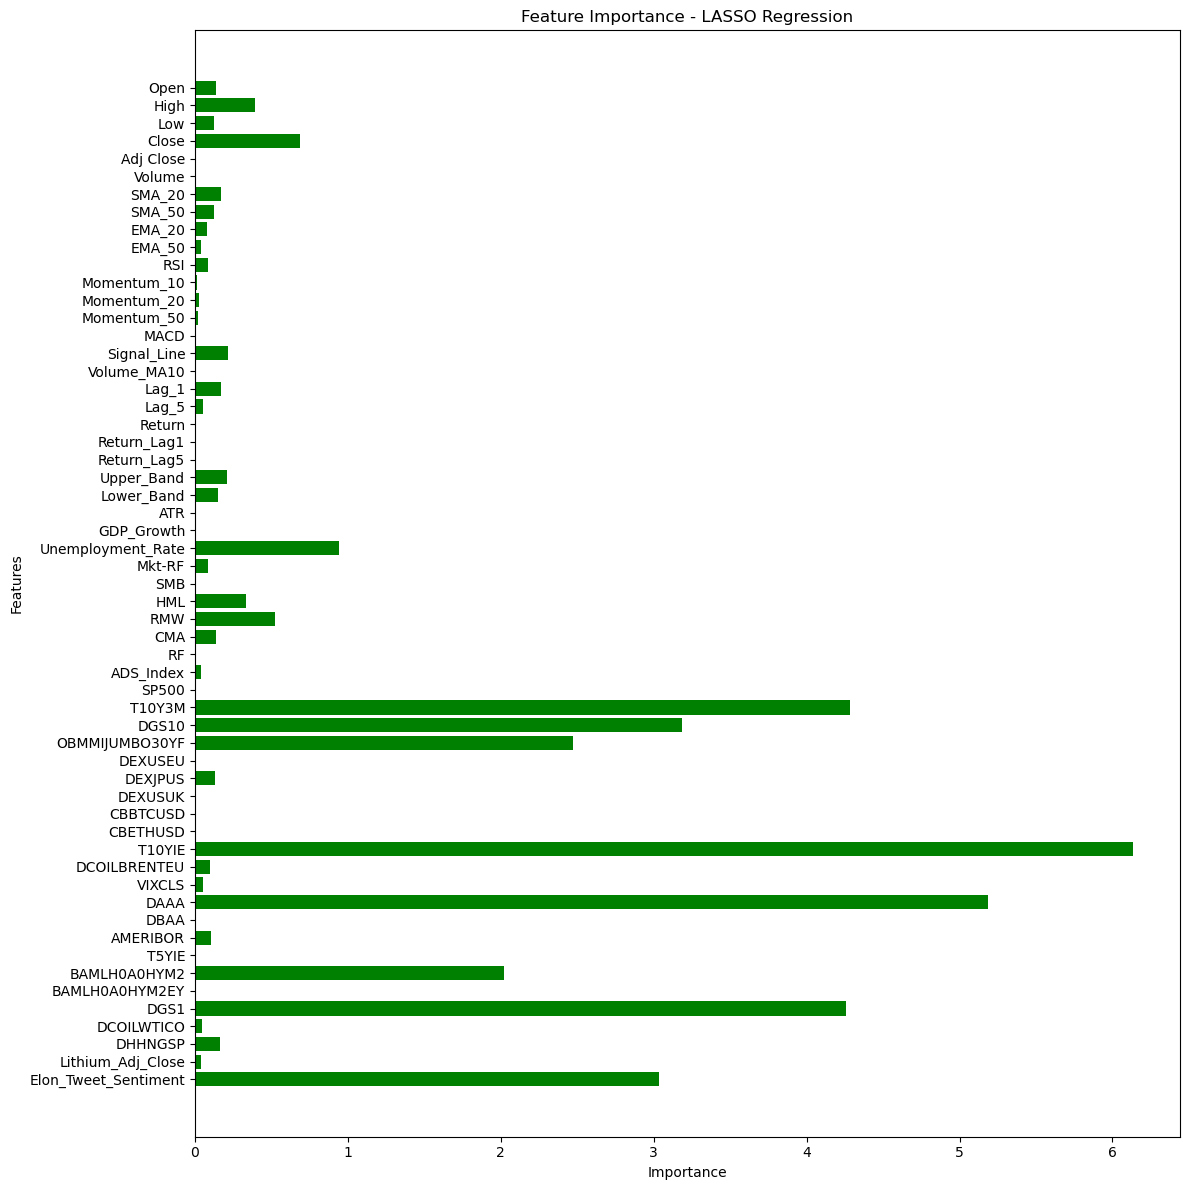

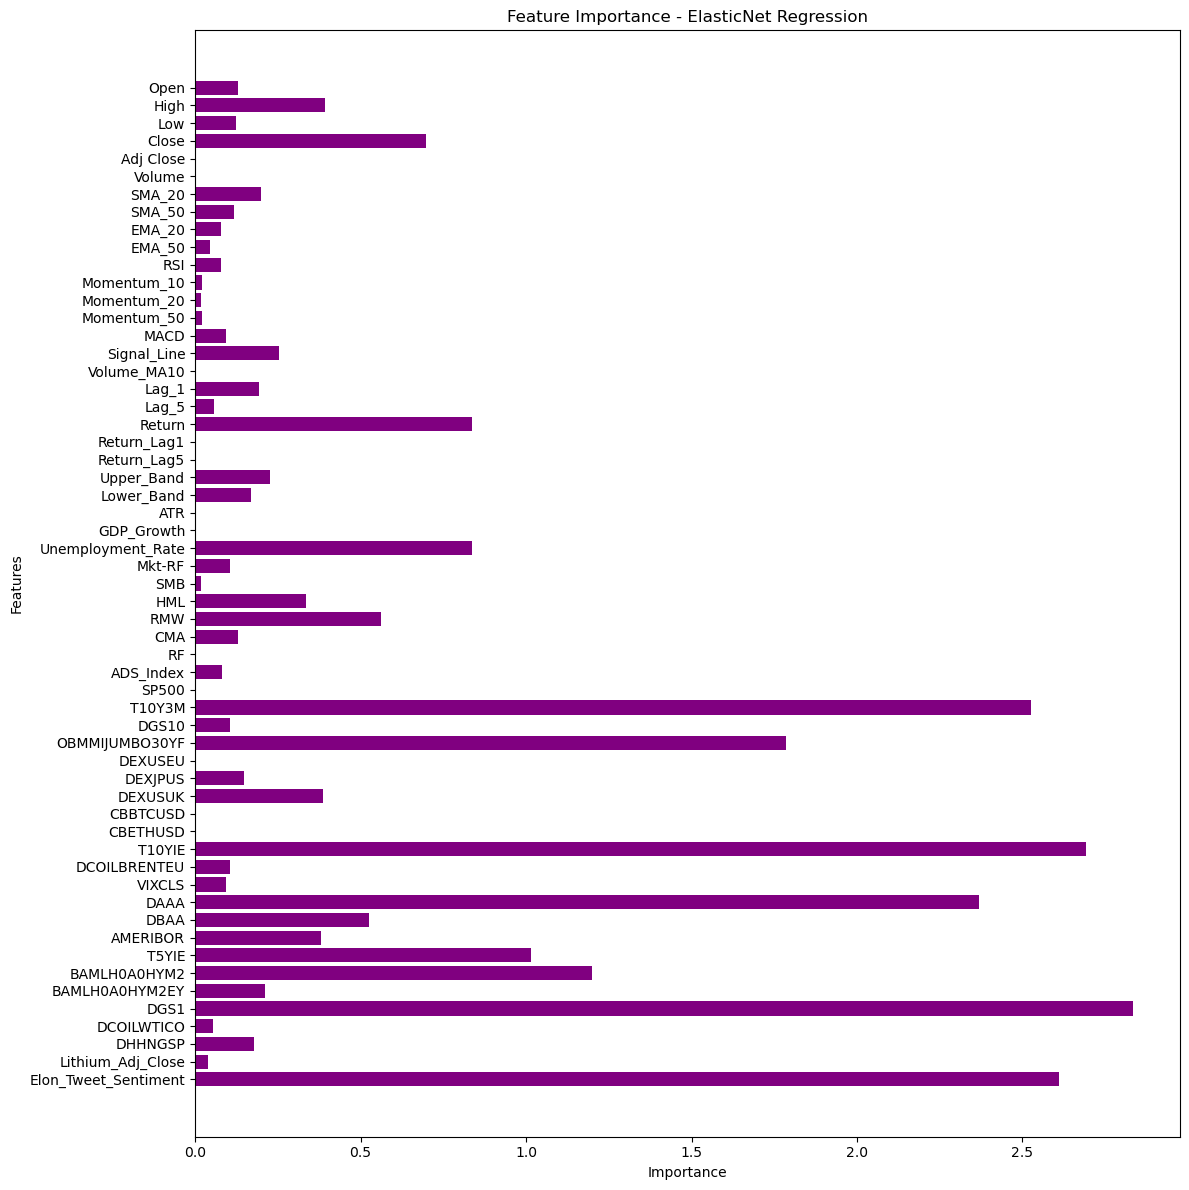

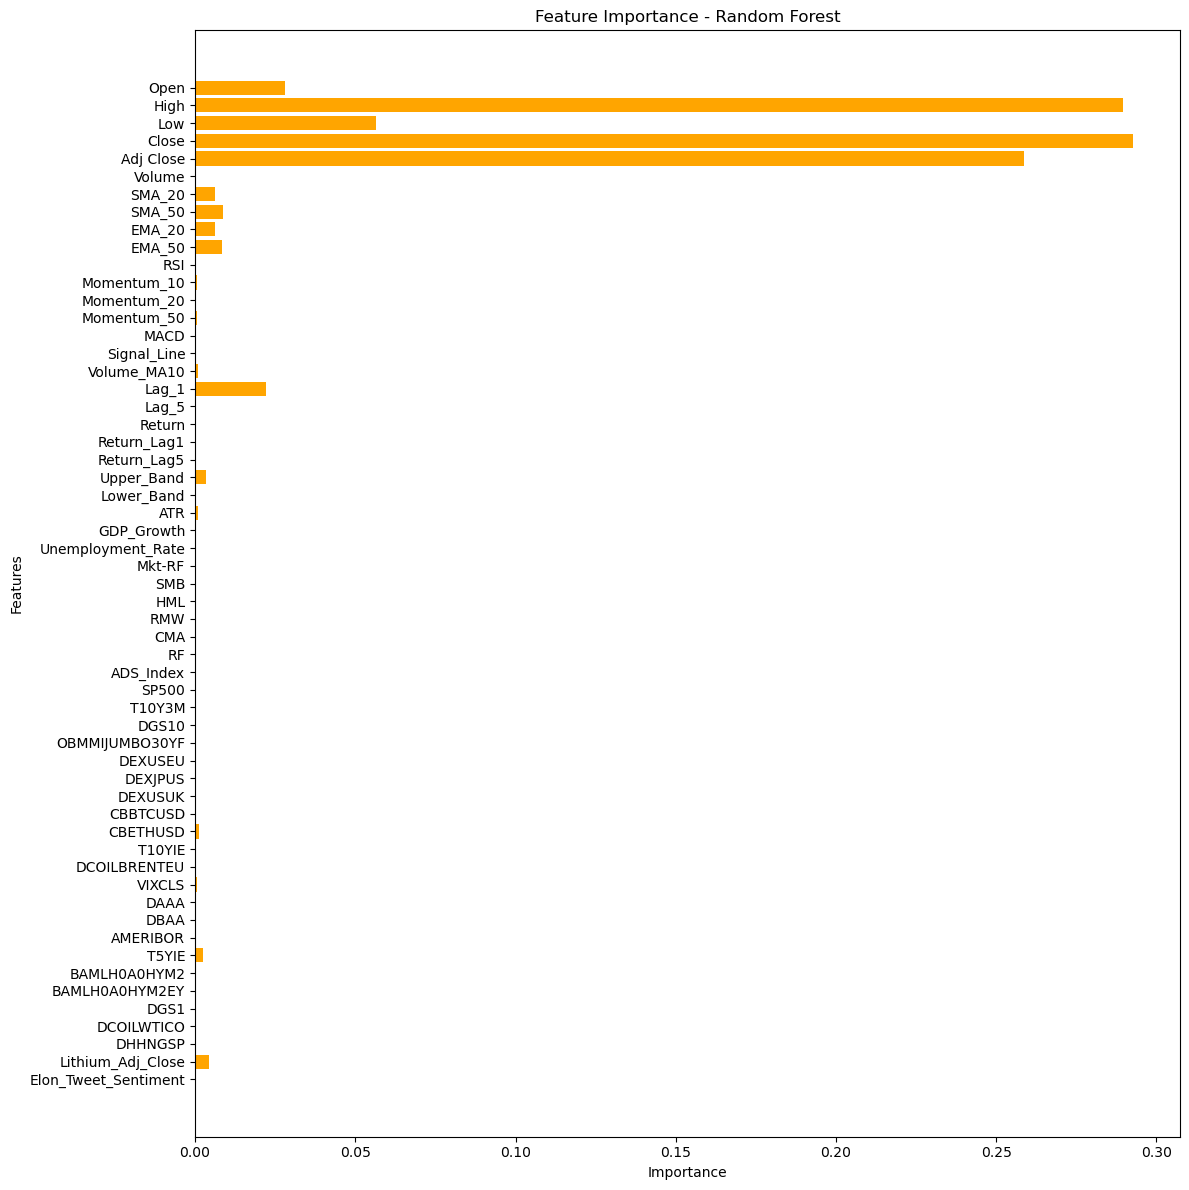

<Figure size 1200x800 with 0 Axes>

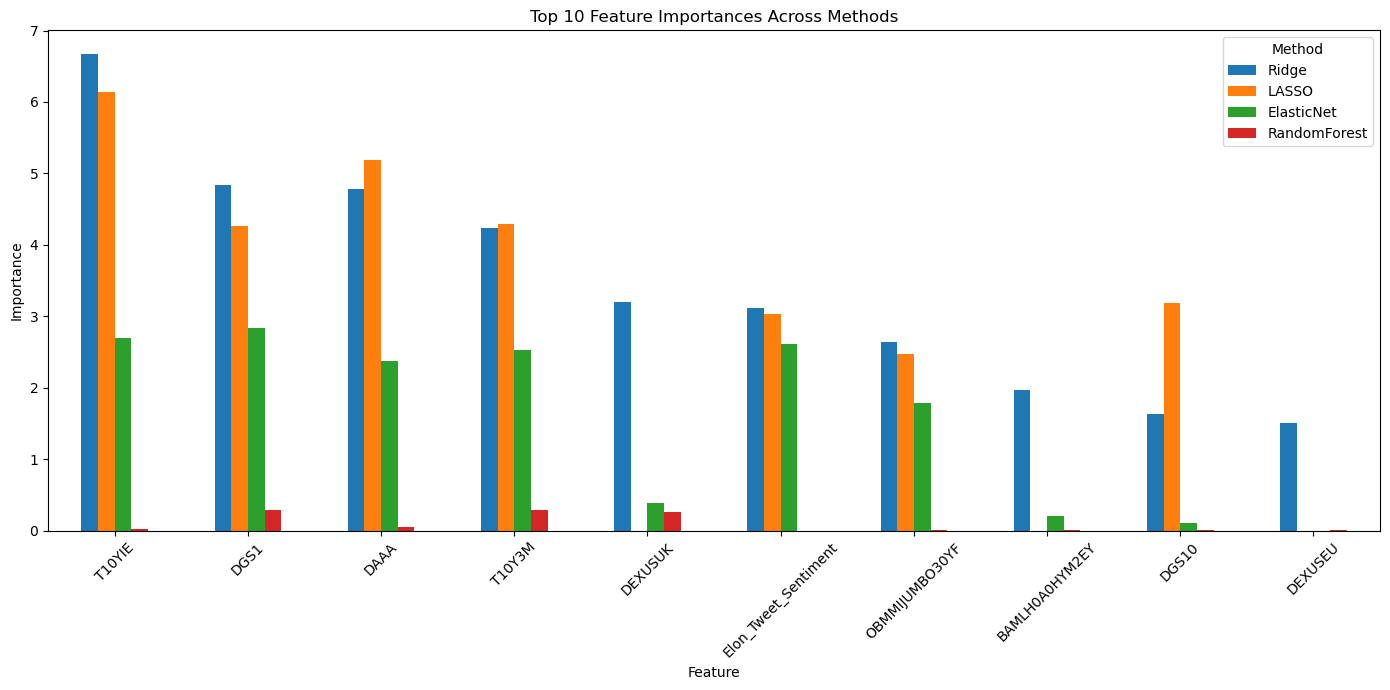

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features (X) and target (y)
data =  DATA
y = data['Target']
X = data.drop(columns=['Target'])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Regression-based Feature Selection
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_importance = np.abs(ridge.coef_)

# LASSO Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_importance = np.abs(lasso.coef_)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_importance = np.abs(elastic_net.coef_)

# Compile importance into a DataFrame for comparison
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_importance,
    'LASSO': lasso_importance,
    'ElasticNet': elastic_net_importance
}).set_index('Feature')

# Sort by Ridge importance for better visualization
importance_df.sort_values('Ridge', ascending=False, inplace=True)

# 2. Tree-based Feature Selection
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# Add Random Forest importance to the DataFrame
importance_df['RandomForest'] = rf_importance

# Ridge Regression Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, ridge_importance, color='blue')
plt.title('Feature Importance - Ridge Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# LASSO Regression Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, lasso_importance, color='green')
plt.title('Feature Importance - LASSO Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ElasticNet Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, elastic_net_importance, color='purple')
plt.title('Feature Importance - ElasticNet Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Random Forest Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, rf_importance, color='orange')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Visualize feature importance
plt.figure(figsize=(12, 8))
importance_df[['Ridge', 'LASSO', 'ElasticNet', 'RandomForest']].head(10).plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Feature Importances Across Methods')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.tight_layout()
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

# Helper function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"{name} Performance:")
    print(f"  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print("-" * 40)
    return test_r2

# Ridge Regression
ridge_r2 = evaluate_model(ridge, X_train, y_train, X_test, y_test, "Ridge Regression")

# LASSO Regression
lasso_r2 = evaluate_model(lasso, X_train, y_train, X_test, y_test, "LASSO Regression")

# ElasticNet Regression
elastic_net_r2 = evaluate_model(elastic_net, X_train, y_train, X_test, y_test, "ElasticNet Regression")

# Random Forest
rf_r2 = evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# Compare the R² values
results = {
    "Ridge Regression": ridge_r2,
    "LASSO Regression": lasso_r2,
    "ElasticNet Regression": elastic_net_r2,
    "Random Forest": rf_r2
}

best_model = max(results, key=results.get)
print(f"The most accurate model is: {best_model} with R² = {results[best_model]:.4f}")


Ridge Regression Performance:
  Train MSE: 61.1308, Test MSE: 64.8770
  Train R²: 0.9898, Test R²: 0.9896
----------------------------------------
LASSO Regression Performance:
  Train MSE: 62.0533, Test MSE: 66.1951
  Train R²: 0.9897, Test R²: 0.9894
----------------------------------------
ElasticNet Regression Performance:
  Train MSE: 62.3862, Test MSE: 66.2645
  Train R²: 0.9896, Test R²: 0.9893
----------------------------------------
Random Forest Performance:
  Train MSE: 10.6295, Test MSE: 75.8417
  Train R²: 0.9982, Test R²: 0.9878
----------------------------------------
The most accurate model is: Ridge Regression with R² = 0.9896


### Model Training and Performance Comparison

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Optimized Training RMSE: 4.7471
Optimized Testing RMSE: 8.9911
R² Score: 0.9870
Predicted Stock Price for the Next Day: $187.33


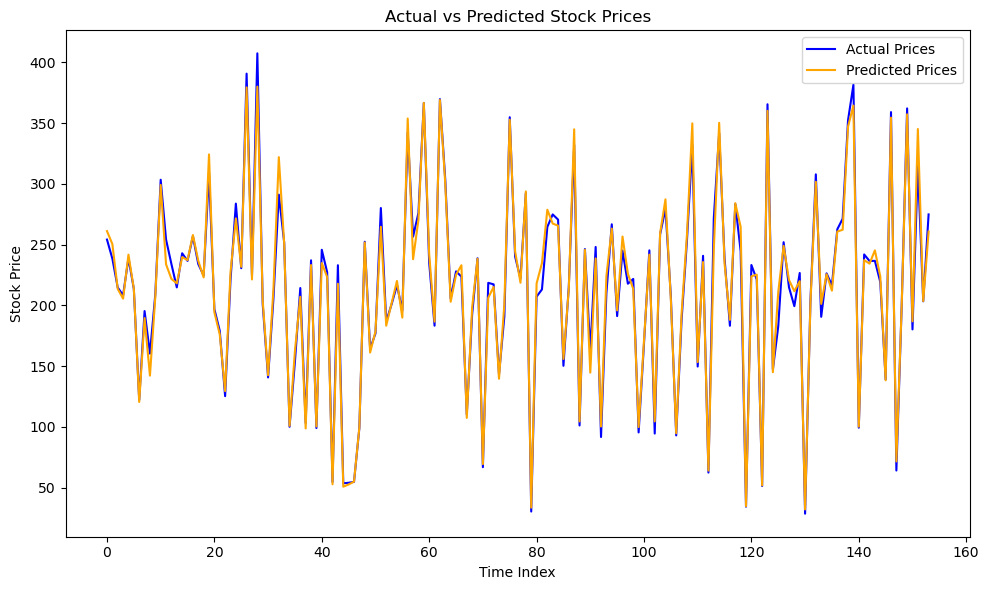

In [100]:
# Model 1 - authoured by Sahana
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search for hyperparameter tuning
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Retrieve the best model
best_rf_model = rf_random.best_estimator_

# Train the best model
best_rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Evaluate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Optimized Training RMSE: {train_rmse:.4f}")
print(f"Optimized Testing RMSE: {test_rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Predict the next day based on the last available data
latest_data = X.iloc[-1:]  # Extract the most recent feature data
next_day_prediction = best_rf_model.predict(latest_data)[0]

print(f"Predicted Stock Price for the Next Day: ${next_day_prediction:.2f}")

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Prices', color='orange', linestyle='-')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()


In [101]:
#checking for overfitting
rf_model.fit(X_train, y_train)

# Compare performance
train_pred = rf_model.predict(X_train)
val_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
val_mse = mean_squared_error(y_test, val_pred)

print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)

# Large difference indicates overfitting

Train MSE: 40.3600396441844
Validation MSE: 76.15750619910327


In [102]:
#2 model by sahana
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = './Final_Feature_Database.csv'
data = pd.read_csv(file_path)

# Preprocessing
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

# Select features and target
features = data.drop(columns=['Date', 'Target']).fillna(method='ffill').fillna(method='bfill')
target = data['Target']

# Normalize features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(X, y, time_steps=30):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i+time_steps])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 30  # Use 30 days of historical data
X, y = create_sequences(features_scaled, target_scaled, time_steps=time_steps)

# Train-test split
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build a simplified LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred)
y_test_rescaled = scaler_target.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


Epoch 1/100


/var/folders/x9/z3xf5lkj3014s60lwsc6hrlw0000gn/T/ipykernel_34609/2314327191.py:20: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0434 - val_loss: 0.0198
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - val_loss: 0.0187
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - val_loss: 0.0178
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - val_loss: 0.0527
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - val_loss: 0.0517
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - val_loss: 0.0278
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - val_loss: 0.0385
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - val_loss: 0.0291
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - val_loss: 0.0408
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - val_loss: 0.0485
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0219
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - val_lo

Training RMSE: 0.0533
Testing RMSE: 0.0505


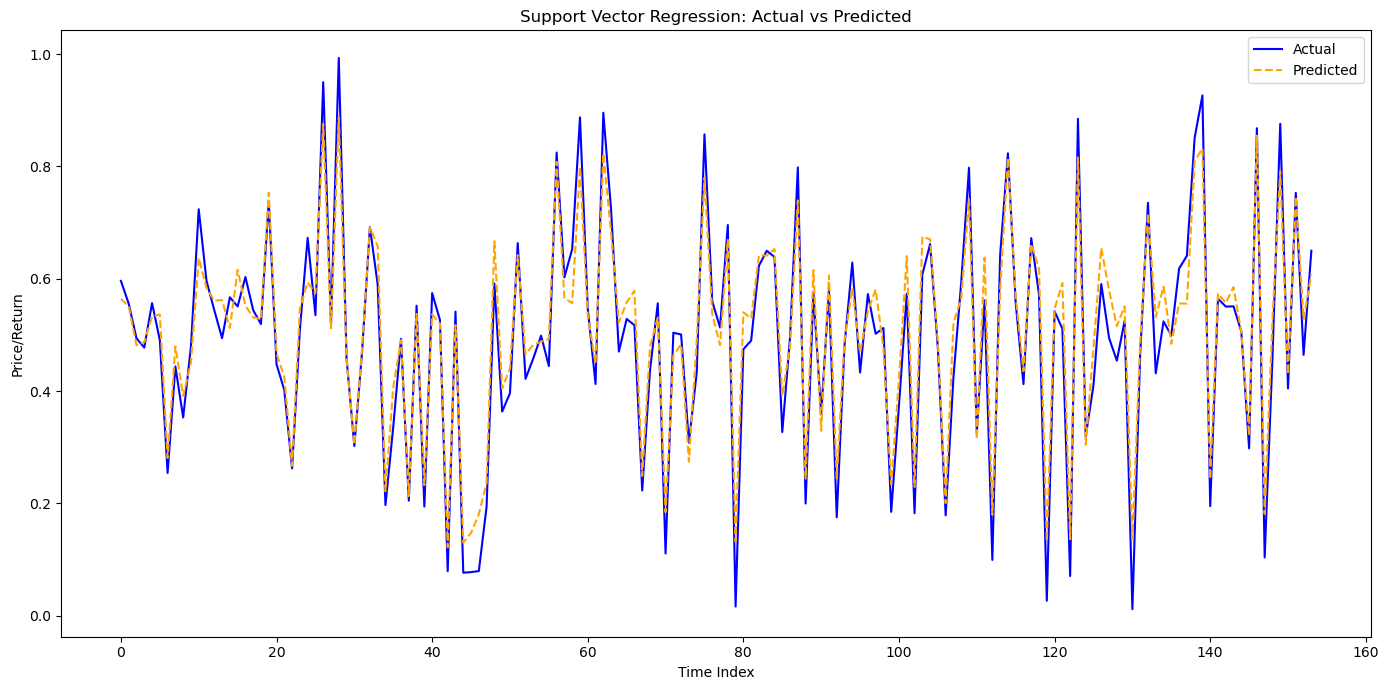

In [103]:
# Model 3 - authored by ZenanFan

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
data = pd.read_csv('Final_Feature_Database.csv', index_col=0, parse_dates=True)
target_column = 'Target'

# Ensure the target variable exists
if target_column not in data.columns:
    raise ValueError(f"{target_column} not found in the dataset.")

# Select all numeric features
features = data.select_dtypes(include=['float64', 'int64']).drop(columns=[target_column]).columns
data = data.dropna()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Split into training and testing sets
X = scaled_data[features]
y = scaled_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Support Vector Regression Model
model = SVR(
    kernel='rbf',  # Radial Basis Function kernel
    C=1.0,         # Regularization parameter
    epsilon=0.1    # Specifies the epsilon-tube within which no penalty is associated
)
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

# Step 4: Visualize results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='--')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.xlabel('Time Index')
plt.ylabel('Price/Return')
plt.legend()
plt.tight_layout()
plt.show()

Root Mean Squared Error (RMSE): 11.2251434702823


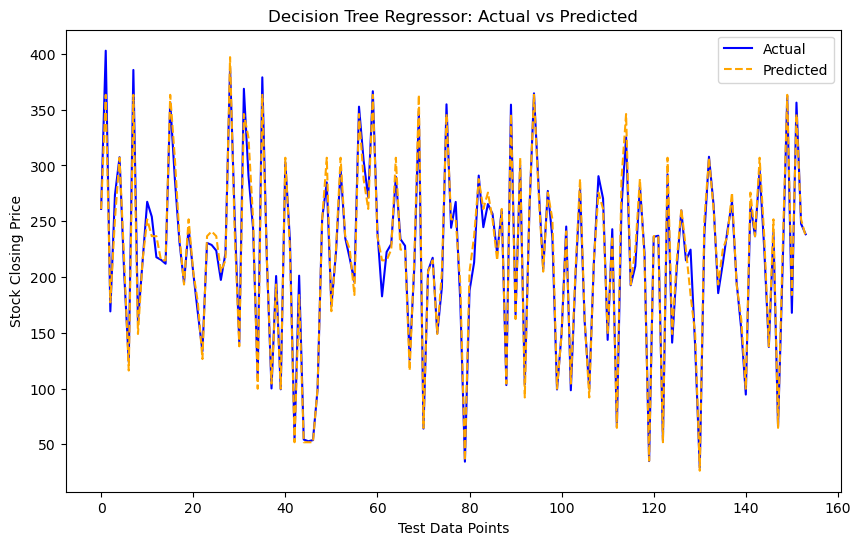

In [104]:
#model by songa pradeepthi
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
 
# Step 1: Load Tesla stock data locally
file_path = './Final_Feature_Database.csv'
try:
    data = pd.read_csv(file_path, index_col=0, parse_dates=True)
except Exception as e:
    print(f"Error loading Tesla data: {e}")
    raise
 
# Filter data by the specified start and end dates
start_date = '2020-01-01'
end_date = '2024-08-31'
data = data.loc[(data.index >= start_date) & (data.index <= end_date)]
 
# Define the target column
target_column = 'Close'  # Assuming 'Close' is the target column
 
# Ensure necessary features exist, generate if missing
if 'Lag_1' not in data.columns or 'Lag_2' not in data.columns:
    data['Lag_1'] = data['Close'].shift(1)
    data['Lag_2'] = data['Close'].shift(2)
 
# Drop rows with NaN values
data.dropna(subset=['Lag_1', 'Lag_2', target_column], inplace=True)
 
# Define features (X) and target (y)
X = data[['Lag_1', 'Lag_2']]
y = data[target_column]
 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Step 3: Model Training
# Initialize and train Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)
 
# Predict on test data
y_pred = model.predict(X_test)
 
# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
 
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange', linestyle='--')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Closing Price')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.legend()
plt.show()

Training RMSE: 0.0008
Testing RMSE: 0.0217


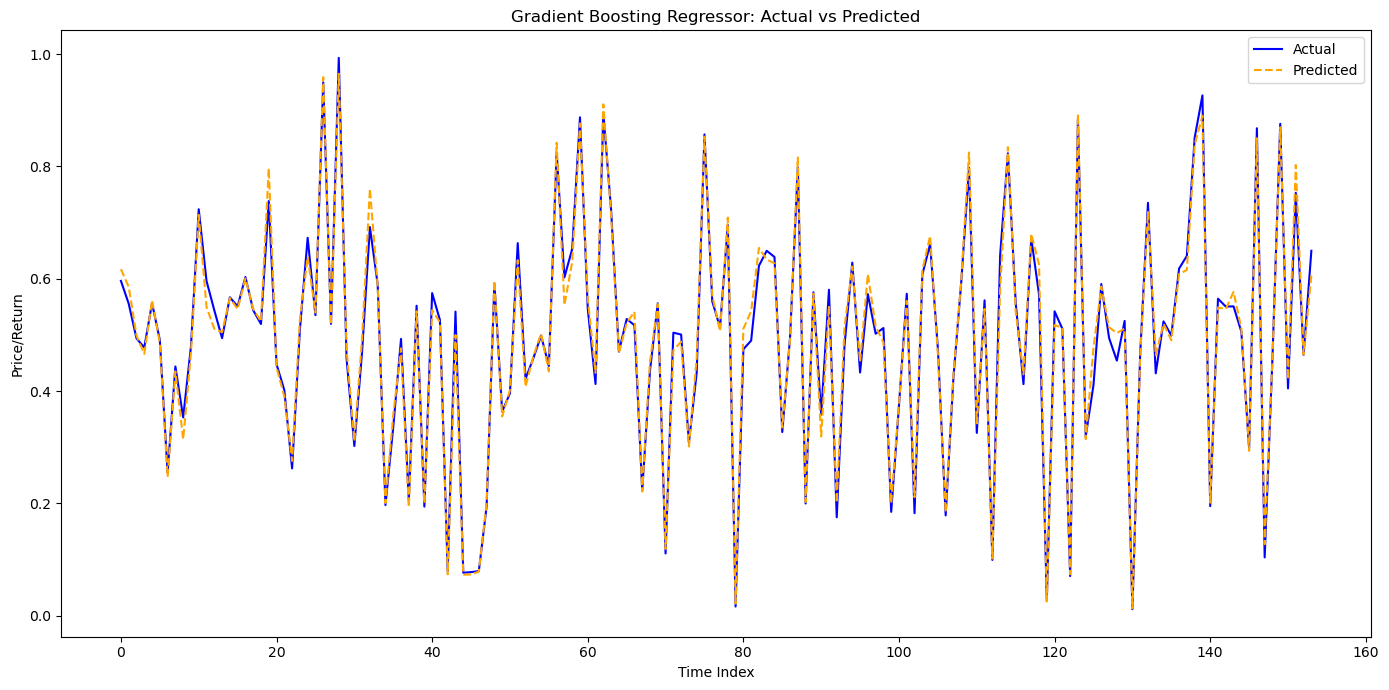

In [105]:
# Model 5 - authored by Zuyi
# Gradient Boosting Regressor Model

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
data = pd.read_csv('Final_Feature_Database.csv', index_col=0, parse_dates=True)
target_column = 'Target'

# Ensure the target variable exists
if target_column not in data.columns:
    raise ValueError(f"{target_column} not found in the dataset.")

# Select all features
features = [col for col in data.columns if col != target_column]
data = data.dropna()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Split into training and testing sets
X = scaled_data[features]
y = scaled_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=9,
    min_samples_split=18,
    min_samples_leaf=5,
    subsample=0.5,
    random_state=42
)
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

# Step 4: Visualize results
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='--')
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.xlabel('Time Index')
plt.ylabel('Price/Return')
plt.legend()
plt.tight_layout()
plt.show()

Training set size: (616, 57)
Testing set size: (154, 57)

Training XGBoost Regressor...

Training RMSE: 1.0591
Testing RMSE: 8.8073


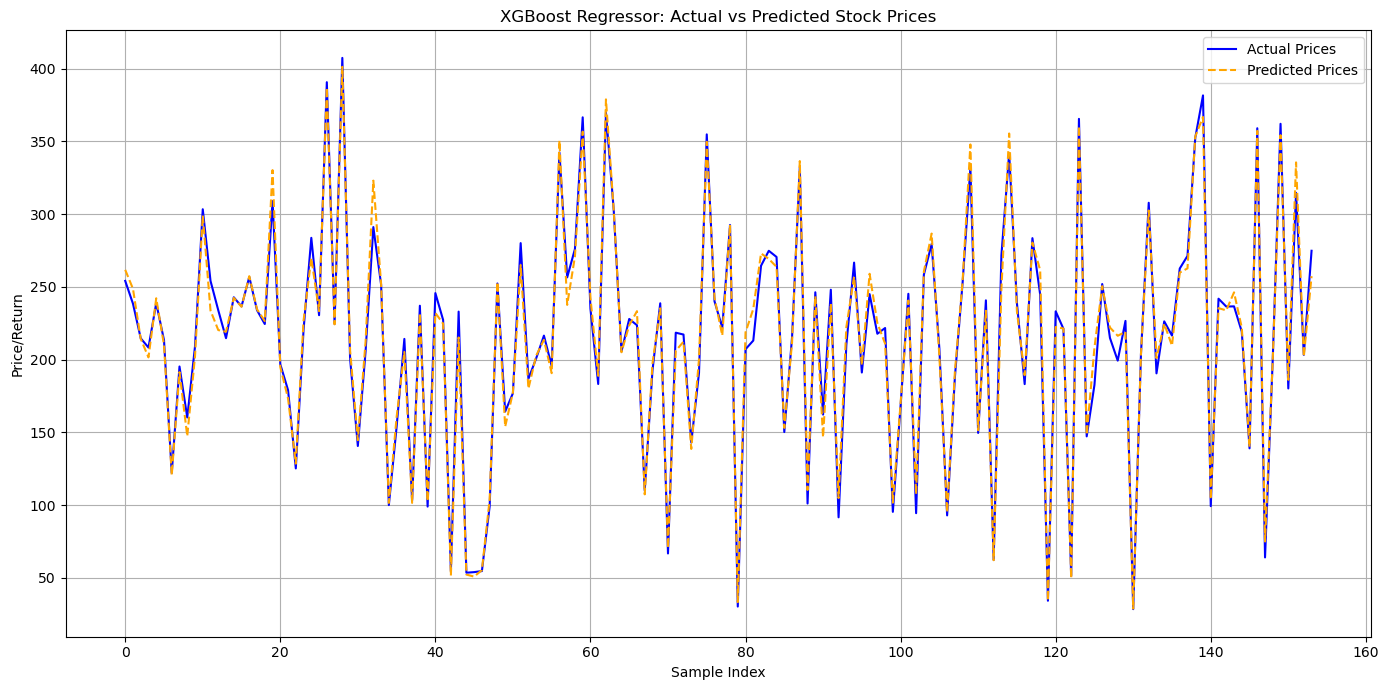

In [106]:
# Model 6 - Authored by Yinhao Zhao
# XGBoost Regressor Model

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
data = pd.read_csv('Final_Feature_Database.csv', index_col=0, parse_dates=True)
target_column = 'Target'

# Ensure the target variable exists
if target_column not in data.columns:
    raise ValueError(f"'{target_column}' not found in the dataset.")

# Select all features except the target
features = [col for col in data.columns if col != target_column]
data = data.dropna()

# Define features (X) and target (y)
X = data[features]
y = data[target_column]

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features, index=X.index)

# Step 3: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Step 4: Initialize XGBoost Regressor with Parameters
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Step 5: Train the XGBoost Regressor
print("\nTraining XGBoost Regressor...")
xgb_model.fit(X_train, y_train)

# Step 6: Make Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Step 7: Evaluate the Model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTraining RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

# Step 8: Visualize Actual vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_test_pred, label='Predicted Prices', color='orange', linestyle='--')
plt.title('XGBoost Regressor: Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price/Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [107]:
#Model Training and Performance Comparison


In [108]:
#Benchmark Study(Assignment2 Garch & Kalman)


## Kalman Filter

[*********************100%***********************]  1 of 1 completed


         Current function value: 4322.488238
         Iterations: 21
         Function evaluations: 417
         Gradient evaluations: 82


/Users/sahanajprakash/Repos/python-data/env/lib/python3.12/site-packages/scipy/optimize/_minimize.py:726: OptimizeWarning:

Desired error not necessarily achieved due to precision loss.



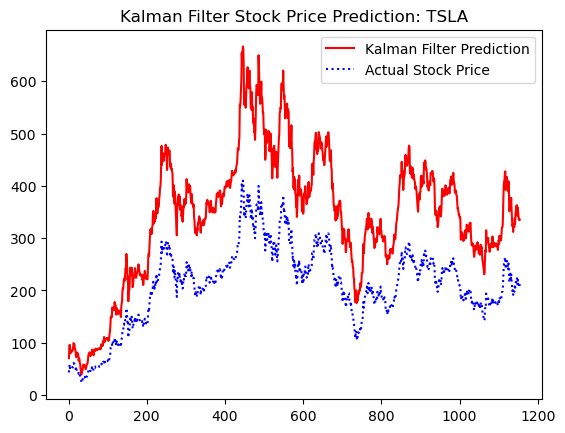

RMSE value is: $ 140.13264896614328


In [109]:
#Kalman filter code to predict Tesla's daily stock prices
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
 
stock_symbol = 'TSLA'
 
#add the date range
start_date = datetime(2020,1,31)
end_date = datetime(2024,8,31)
 
# Download stock data
stock = yf.download(stock_symbol, start_date, end_date)
def kalman_filter(param, *args):
    # initialize params
    Z = param[0]
    T = param[1]
    H = param[2]
    Q = param[3]
    # initialize vector values:
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    Y, S = args
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * np.transpose(T) + Q
    Likelihood = 0
    for s in range(1, S):
        F[s] = Z * P_predict[s - 1] * np.transpose(Z) + H
        v[s] = Y[s - 1] - Z * u_predict[s - 1]
        u_update[s] = u_predict[s - 1] + P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s - 1] - P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * Z * P_predict[s - 1]
        P_predict[s] = T * P_update[s] * np.transpose(T) + Q
        Likelihood += (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(abs(F[s])) + (1 / 2) * np.transpose(v[s]) * (1 / F[s]) * v[s]
 
    return Likelihood
 
def kalman_smoother(params, *args):
    # initialize params
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    # initialize vector values:
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    Y, S = args
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * np.transpose(T) + Q
    for s in range(1, S):
        F[s] = Z * P_predict[s - 1] * np.transpose(Z) + H
        v[s] = Y[s - 1] - Z * u_predict[s - 1]
        u_update[s] = u_predict[s - 1] + P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s - 1] - P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * Z * P_predict[s - 1]
        P_predict[s] = T * P_update[s] * np.transpose(T) + Q
 
    u_smooth, P_smooth = {}, {}
    u_smooth[S - 1] = u_update[S - 1]
    P_smooth[S - 1] = P_update[S - 1]
    for t in range(S - 1, 0, -1):
        u_smooth[t - 1] = u_update[t] + P_update[t] * np.transpose(T) / P_predict[t] * (u_smooth[t] - T * u_update[t])
        P_smooth[t - 1] = P_update[t] + P_update[t] * np.transpose(T) / P_predict[t] * (P_smooth[t] - P_predict[t]) / P_predict[t] * T * P_update[t]
 
    smooth_path = u_smooth
    return smooth_path
 
Y = stock['Adj Close'].values
S = Y.shape[0]
 
# Initial parameters
param0 = np.array([9.8,1.8, np.var(Y) / 30, np.var(Y) / 20])
results = minimize(kalman_filter, param0, args=(Y, S), method='BFGS', tol=1e-2, options={'disp': True})
 
# Smoothe and visualize the estimated path
param_star = results.x
path = kalman_smoother(param_star, Y, S)
sorted_path = dict(sorted(path.items()))
Y_kalmanFilter = sorted_path.values()
 
# Plotting results
timevec = np.linspace(1, S, S)
plt.title('Kalman Filter Stock Price Prediction: ' + stock_symbol)
plt.plot(timevec, Y_kalmanFilter, 'r', label='Kalman Filter Prediction')
plt.plot(timevec, Y, 'b:', label='Actual Stock Price')
plt.legend()
plt.show()
 
# Extracting the dictionary values into a list (in the same order as keys)
kalman_values = list(Y_kalmanFilter)
 
# Calculate RMSE
RMSE = np.sqrt(np.mean((np.array(kalman_values) - np.array(Y)) ** 2))
print('RMSE value is: $', RMSE)

In [110]:
# Trading Rules and Signal Generation

## Trading Rules

### Rule 1: SMA Crossing Strategy
#### Logic: 
buy when a short-term SMA (e.g. SMA_20) crosses a long-term SMA (e.g. SMA_50); sell when a short-term SMA crosses a long-term SMA.
#### Condition:
Buy signal: SMA_20 > SMA_50 and the previous day SMA_20 <= SMA_50
Sell signal: SMA_20 < SMA_50 and previous day SMA_20 >= SMA_50
### Rule 2: Momentum Strategy
#### Logic: 
buy when momentum (Momentum_20) is positive and increasing; sell when it is negative and decreasing.
#### Condition:
Buy signal: Momentum_20 > 0 and Momentum_20 > previous day's Momentum_20
Sell signal: Momentum_20 < 0 and Momentum_20 < Momentum_20 of the previous day.
### Rule 3: Bollinger Band Strategy
#### Logic: 
Sell when price breaks above the upper Bollinger Band; Buy when it falls below the lower band.
#### Conditions:
Buy signal: Close < Lower_Band
Sell signal: Close > Upper_Band
### Rule 4: Sentiment-based strategies
#### Logic: 
utilize the Elon_Tweet_Sentiment indicator. Buy when sentiment is significantly positive; sell when significantly negative.
#### Condition:
Buy signal: Elon_Tweet_Sentiment > some threshold (e.g. 0.2)
Sell signal: Elon_Tweet_Sentiment < some threshold (e.g. -0.2）

Translated with DeepL.com (free version)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Final Capital for Each Model:
                           Final Capital
RandomForestRegressor       6.292166e-02
LSTM                        6.345723e-02
SVR                         3.648713e-06
GradientBoostingRegressor   2.926865e+01
XGBoostRegressor            9.741251e-01
DecisionTreeRegressor       3.602259e+07


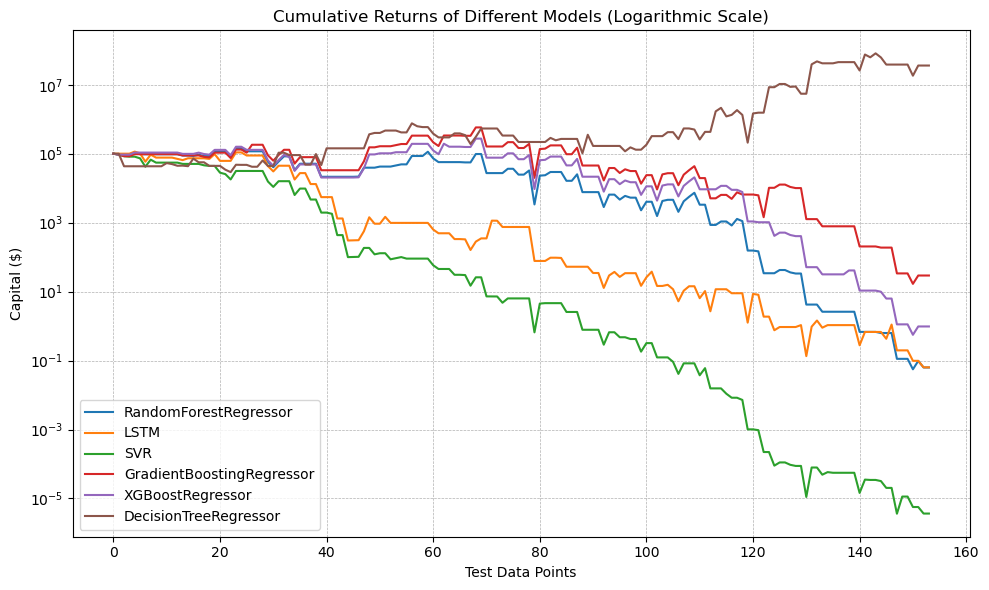

In [113]:
# # 1 means buy, -1 means sell, 0 means stay the same

# # Rule 1: Moving Average Crossover
# def moving_average_crossover(df):
#     df['Signal_MA'] = 0
#     df['Signal_MA'] = np.where((df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) <= df['SMA_50'].shift(1)), 1, df['Signal_MA'])
#     df['Signal_MA'] = np.where((df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) >= df['SMA_50'].shift(1)), -1, df['Signal_MA'])
#     return df

# # Rule 2: Momentum Strategy
# def momentum_strategy(df):
#     df['Signal_Momentum'] = 0
#     df['Signal_Momentum'] = np.where((df['Momentum_20'] > 0) & (df['Momentum_20'] > df['Momentum_20'].shift(1)), 1, df['Signal_Momentum'])
#     df['Signal_Momentum'] = np.where((df['Momentum_20'] < 0) & (df['Momentum_20'] < df['Momentum_20'].shift(1)), -1, df['Signal_Momentum'])
#     return df

# # Rule 3: Bollinger Bands Strategy
# def bollinger_band_strategy(df):
#     df['Signal_Bollinger'] = 0
#     df['Signal_Bollinger'] = np.where(df['Close'] < df['Lower_Band'], 1, df['Signal_Bollinger'])
#     df['Signal_Bollinger'] = np.where(df['Close'] > df['Upper_Band'], -1, df['Signal_Bollinger'])
#     return df

# # Rule 4: Sentiment Strategy
# def sentiment_based_strategy(df, sentiment_threshold=0.2):
#     df['Signal_Sentiment'] = 0
#     df['Signal_Sentiment'] = np.where(df['Elon_Tweet_Sentiment'] > sentiment_threshold, 1, df['Signal_Sentiment'])
#     df['Signal_Sentiment'] = np.where(df['Elon_Tweet_Sentiment'] < -sentiment_threshold, -1, df['Signal_Sentiment'])
#     return df


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the trading signal and profit/loss calculation function
def generate_trading_signals(actual_prices, predicted_prices, initial_capital=100000):
    """
    Generate trading signals and calculate cumulative profit/loss.

    Parameters:
    - actual_prices: pandas Series of actual closing prices.
    - predicted_prices: numpy array of predicted closing prices.
    - initial_capital: Starting capital in dollars.

    Returns:
    - DataFrame with Actual_Close, Predicted_Close, Signal, Daily_Return, Cumulative_Profit/Loss
    """
    df = pd.DataFrame({
        'Actual_Close': actual_prices.values,
        'Predicted_Close': predicted_prices
    })

    # Define trading signals
    # Buy: Predicted > Actual
    # Sell: Predicted < Actual
    df['Signal'] = df.apply(
        lambda row: 'Buy' if row['Predicted_Close'] > row['Actual_Close'] else 'Sell',
        axis=1
    )

    # Calculate daily returns
    df['Daily_Return'] = df['Actual_Close'].pct_change()

    # Initialize capital
    capital = initial_capital
    capital_history = []

    # Simulate trading
    for index, row in df.iterrows():
        if row['Signal'] == 'Buy':
            # Buy: Invest all capital
            if not np.isnan(row['Daily_Return']):
                capital *= (1 + row['Daily_Return'])
        elif row['Signal'] == 'Sell':
            # Sell: Do not invest
            capital *= 1  # Capital remains the same
        capital_history.append(capital)

    df['Cumulative_Profit/Loss'] = capital_history

    return df

# Load the dataset
file_path = './Final_Feature_Database.csv'
data = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Define target variable
target_column = 'Target'

# Ensure target variable exists
if target_column not in data.columns:
    raise ValueError(f"'{target_column}' not found in the dataset.")

# Select all features
features = [col for col in data.columns if col != target_column]

# Drop rows with missing values
data = data.dropna(subset=features + [target_column])

# Define features and target
X = data[features]
y = data[target_column]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =======================
# Model 1: RandomForestRegressor
# =======================

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random.best_estimator_

# Predict on test set
y_test_pred_rf = best_rf_model.predict(X_test)

# =======================
# Model 2: LSTM
# =======================
# For simplicity, using random predictions as placeholder
# Replace this with your actual LSTM model predictions

# NOTE: LSTM models typically require sequence data and a different preprocessing pipeline.
# Ensure that y_test_pred_lstm is generated correctly from your trained LSTM model.
# Here, we're using random predictions as placeholders.
y_test_pred_lstm = np.random.uniform(low=y_test.min(), high=y_test.max(), size=len(y_test))

# =======================
# Model 3: SVR
# =======================

# Select features for SVR (assuming same as overall features)
features_svr = features
X_svr = X  # Using the same X_train and X_test
y_svr = y

# Initialize and train SVR
scaler_svr = MinMaxScaler()
X_train_svr_scaled = scaler_svr.fit_transform(X_train)
X_test_svr_scaled = scaler_svr.transform(X_test)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_svr_scaled, y_train)

# Predict on test set
y_test_pred_svr = svm_model.predict(X_test_svr_scaled)

# =======================
# Model 4: DecisionTreeRegressor
# =======================

# Define lag features for DecisionTreeRegressor
# Create a copy to avoid modifying the original data
data_dt = data.copy()

# Generate lag features
data_dt['Lag_1'] = data_dt[target_column].shift(1)
data_dt['Lag_2'] = data_dt[target_column].shift(2)

# Drop rows with NaN in lag features
data_dt = data_dt.dropna(subset=['Lag_1', 'Lag_2', target_column])

# Define features and target for DecisionTreeRegressor
X_dt = data_dt[['Lag_1', 'Lag_2']]
y_dt = data_dt[target_column]

# Split data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42
)

# Initialize and train DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Predict on test set
y_test_pred_dt = dt_model.predict(X_test_dt)

# =======================
# Model 5: GradientBoostingRegressor
# =======================

# Select features for GradientBoostingRegressor (same as overall features)
features_gb = features
X_gb = X
y_gb = y

# Initialize and train GradientBoostingRegressor
scaler_gb = MinMaxScaler()
X_train_gb_scaled = scaler_gb.fit_transform(X_train)
X_test_gb_scaled = scaler_gb.transform(X_test)

gb_model = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=9,
    min_samples_split=18,
    min_samples_leaf=5,
    subsample=0.5,
    random_state=42
)
gb_model.fit(X_train_gb_scaled, y_train)

# Predict on test set
y_test_pred_gb = gb_model.predict(X_test_gb_scaled)

# =======================
# Model 6: XGBoostRegressor
# =======================

# Select features for XGBoostRegressor (same as overall features)
features_xgb = features
X_xgb = X
y_xgb = y

# Initialize and train XGBoostRegressor
scaler_xgb = StandardScaler()
X_train_xgb_scaled = scaler_xgb.fit_transform(X_train)
X_test_xgb_scaled = scaler_xgb.transform(X_test)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_xgb_scaled, y_train)

# Predict on test set
y_test_pred_xgb = xgb_model.predict(X_test_xgb_scaled)

# =======================
# Store Predictions
# =======================

predictions = {
    'RandomForestRegressor': y_test_pred_rf,
    'LSTM': y_test_pred_lstm,
    'SVR': y_test_pred_svr,
    'DecisionTreeRegressor': y_test_pred_dt,
    'GradientBoostingRegressor': y_test_pred_gb,
    'XGBoostRegressor': y_test_pred_xgb
}

# =======================
# Generate Trading Signals and Calculate Profit/Loss
# =======================

# Since Model 4 (DecisionTreeRegressor) has a different test set due to lag features,
# we'll handle it separately.

# Create a dictionary to hold backtest results
backtest_results = {}

# Common test set for Models 1,2,3,5,6
common_models = ['RandomForestRegressor', 'LSTM', 'SVR', 'GradientBoostingRegressor', 'XGBoostRegressor']

for model_name in common_models:
    backtest_df = generate_trading_signals(y_test.reset_index(drop=True), predictions[model_name], initial_capital=100000)
    backtest_results[model_name] = backtest_df

# Handle Model 4 separately
# # Align the test set for DecisionTreeRegressor
backtest_df_dt = generate_trading_signals(y_test_dt.reset_index(drop=True), y_test_pred_dt, initial_capital=100000)
backtest_results['DecisionTreeRegressor'] = backtest_df_dt

# =======================
# Compare Final Capitals
# =======================

# Summarize final capital for each model
final_capitals = {}
for model_name, df in backtest_results.items():
    final_capitals[model_name] = df['Cumulative_Profit/Loss'].iloc[-1]

# Create a summary DataFrame
final_capitals_df = pd.DataFrame.from_dict(final_capitals, orient='index', columns=['Final Capital'])
print("Final Capital for Each Model:")
print(final_capitals_df)

# =======================
# Visualize Cumulative Profit/Loss
# =======================

plt.figure(figsize=(10, 6)) 
for model_name, df in backtest_results.items():
    plt.plot(df.index, df['Cumulative_Profit/Loss'], label=model_name)

plt.title('Cumulative Returns of Different Models (Logarithmic Scale)')
plt.xlabel('Test Data Points')
plt.ylabel('Capital ($)')
plt.yscale('log')  
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

%matplotlib qt 



In [ ]:
import plotly.graph_objects as go
import pandas as pd

# # 将日期列设为索引，便于绘图
# feature_database['Unnamed: 0'] = pd.to_datetime(feature_database['Unnamed: 0'])
# feature_database.set_index('Unnamed: 0', inplace=True)

# 绘制股价和交易信号图
fig_price_signals = go.Figure()

# 添加收盘价折线图
fig_price_signals.add_trace(go.Scatter(
    x=feature_database.index,
    y=feature_database['Close'],
    mode='lines',
    name='Close Price'
))

# 添加买入信号
buy_signals = feature_database[feature_database['Signal'] == 'Buy']
fig_price_signals.add_trace(go.Scatter(
    x=buy_signals.index,
    y=buy_signals['Close'],
    mode='markers',
    name='Buy Signal',
    marker=dict(symbol='triangle-up', color='green', size=10)
))

# 添加卖出信号
sell_signals = feature_database[feature_database['Signal'] == 'Sell']
fig_price_signals.add_trace(go.Scatter(
    x=sell_signals.index,
    y=sell_signals['Close'],
    mode='markers',
    name='Sell Signal',
    marker=dict(symbol='triangle-down', color='red', size=10)
))

fig_price_signals.update_layout(
    title="Stock Prices with Trading Signals",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    template="plotly_white"
)

# 绘制每日回报图
fig_daily_returns = go.Figure()
fig_daily_returns.add_trace(go.Scatter(
    x=feature_database.index,
    y=feature_database['Daily_Return'],
    mode='lines',
    name='Daily Return'
))
fig_daily_returns.update_layout(
    title="Daily Returns",
    xaxis_title="Date",
    yaxis_title="Return",
    template="plotly_white"
)


# 显示交互式图表
fig_price_signals.show()
fig_daily_returns.show()
